In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import pyddsde

ZMQInteractiveShell


# Example 1 : Analysing Fish data

In [44]:
fish_data, t = pyddsde.load_sample_dataset('fish-data-ectropus')

Missing values in time series


Generating Slider data: 100%|██████████| 8/8 [00:00<00:00, 10.48it/s]


| Data Type (vector)   :      True      | Autocorrelation Time :       21       |
| Gaussian Noise       :      True      | Mx range             :   (-1.0, 1.0)  |
| My range             :   (-1.0, 1.0)  | range |M|            :   (0.0, 1.0)   |
| Mx mean              :       nan      | My mean              :       nan      |
| M mean               :       nan      | (dt, delta_t)        :     (21, 1)    |



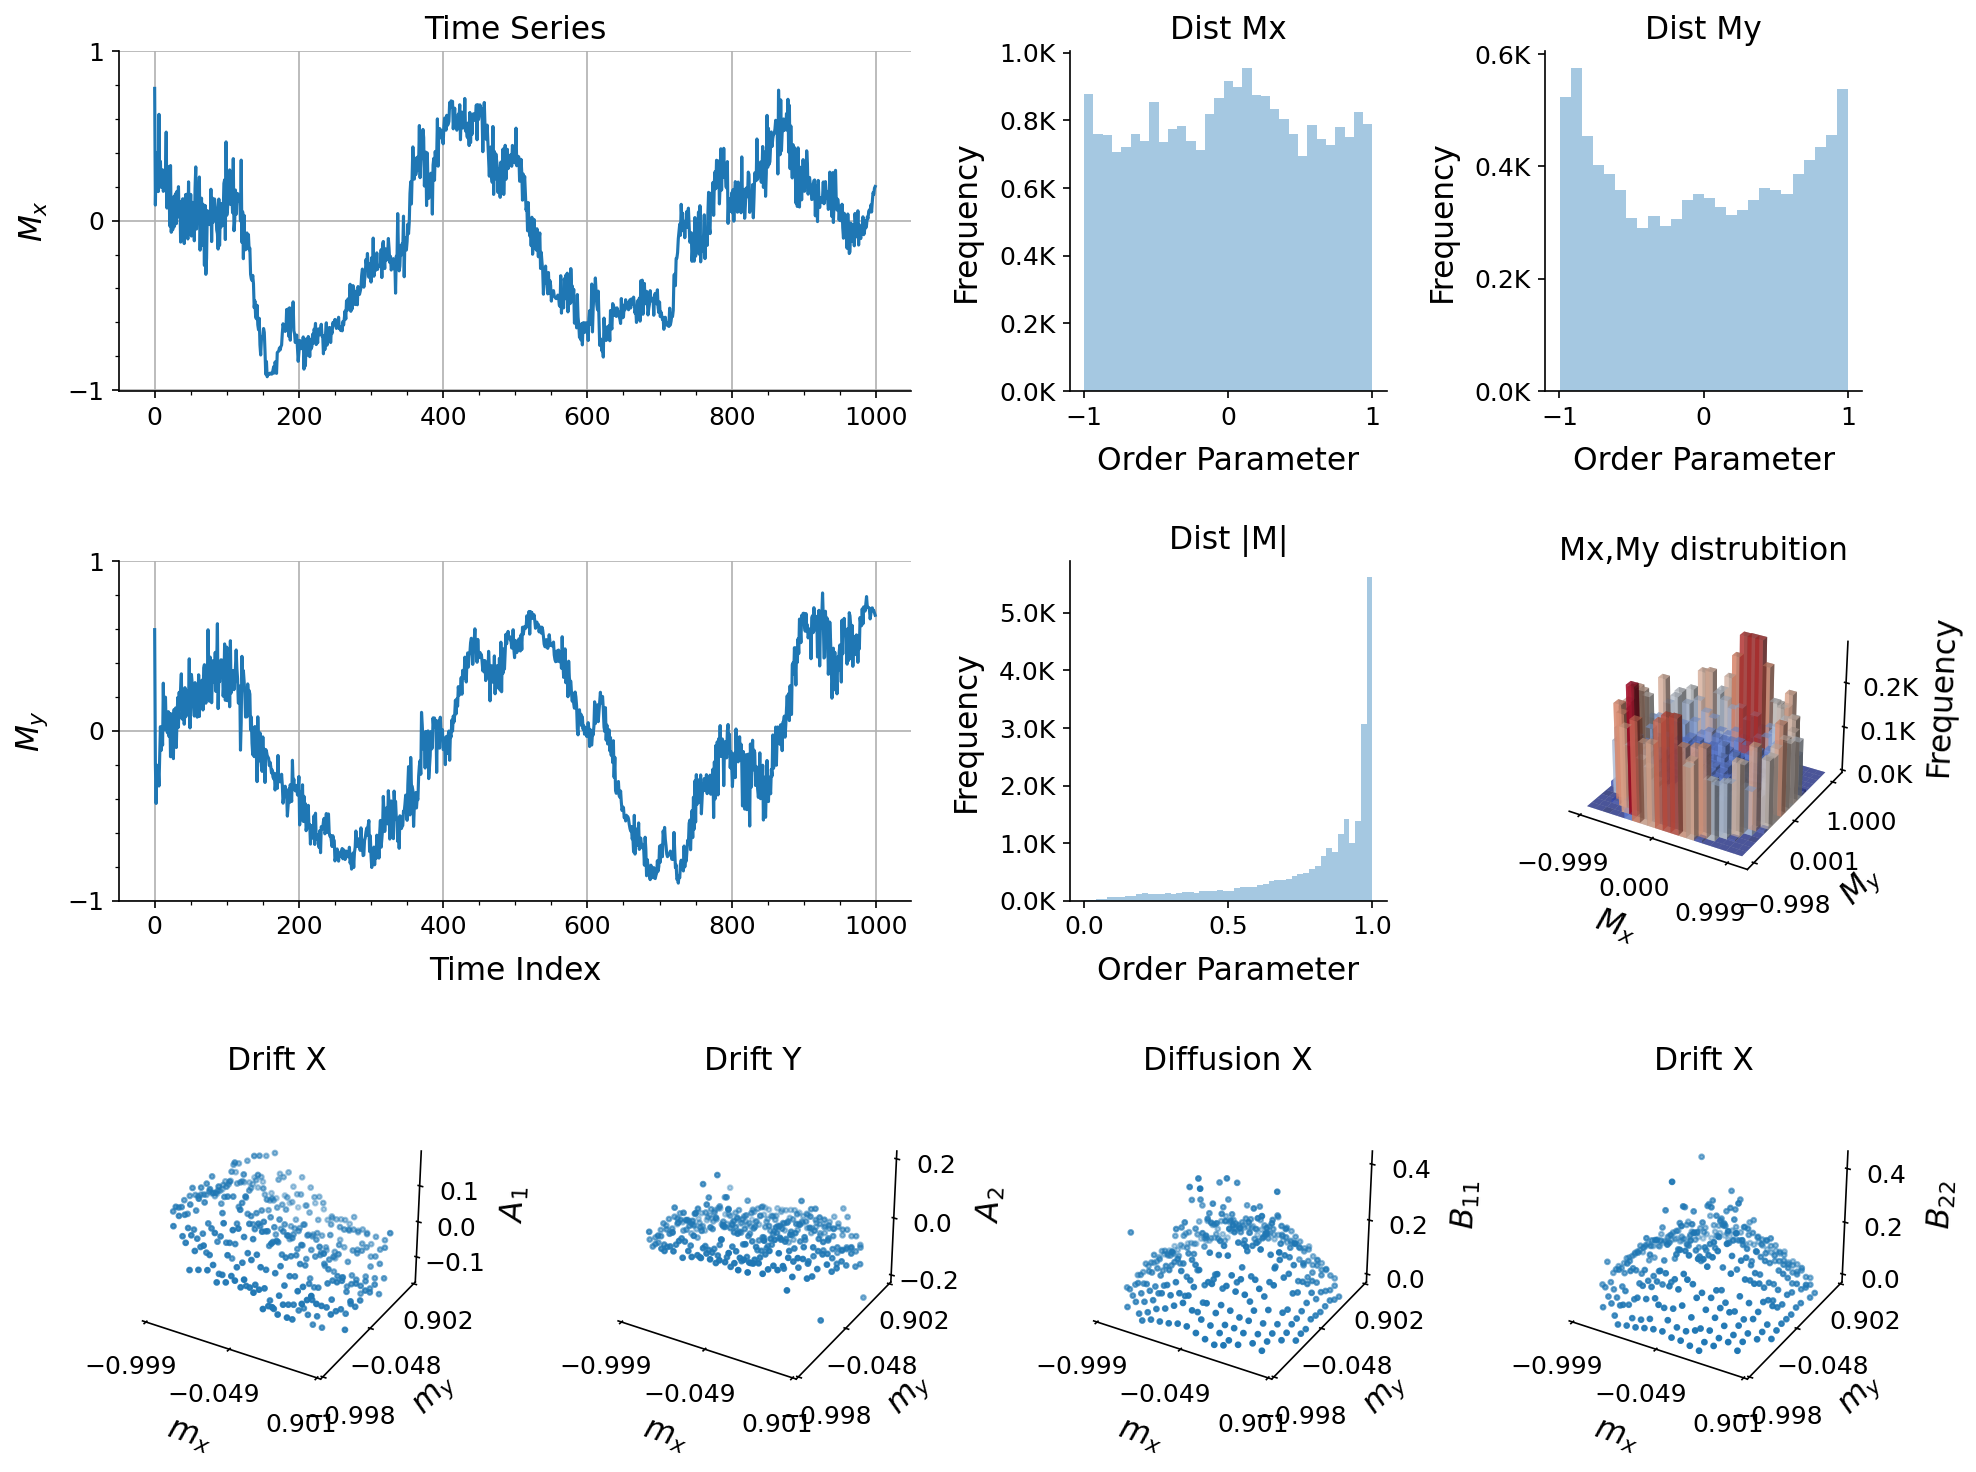

In [49]:
fish_ddsde = pyddsde.Characterize(fish_data, t)

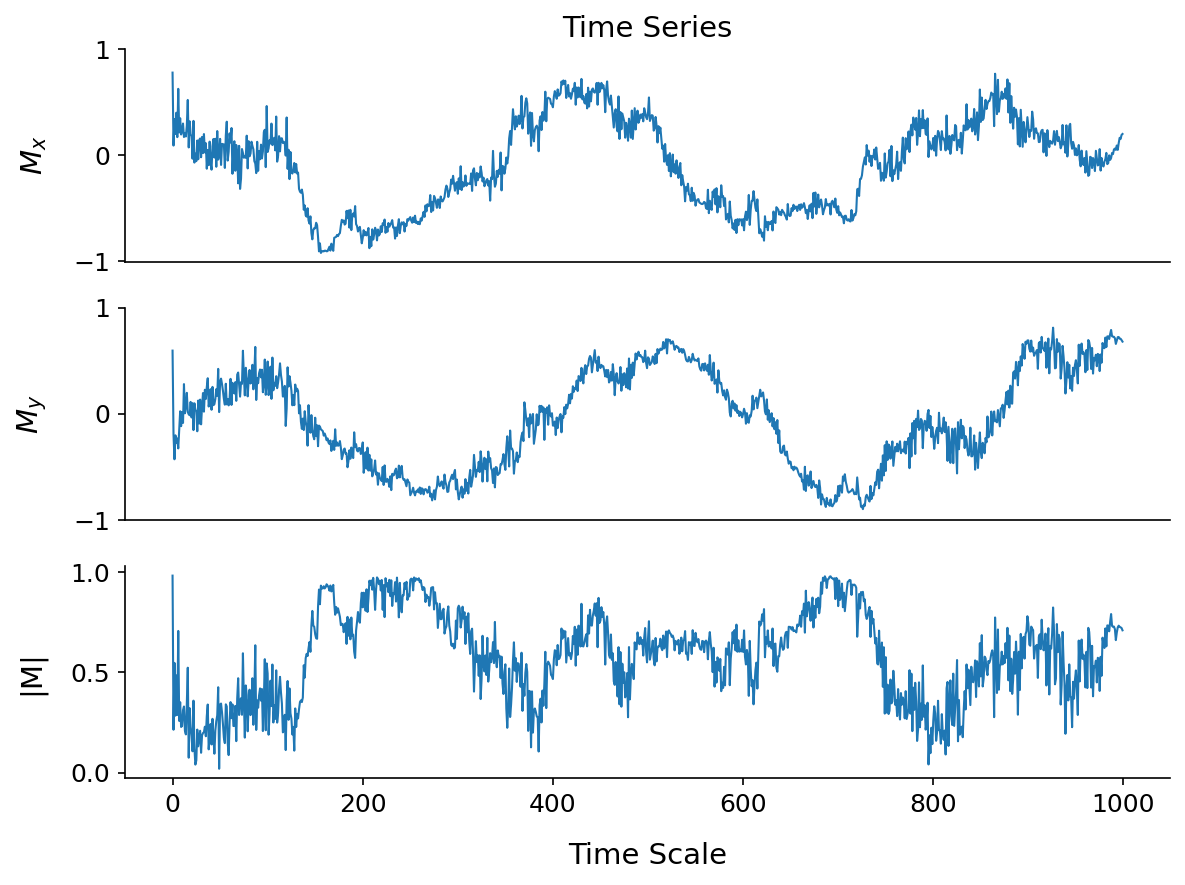

In [67]:
# Show the time series plots
timeseries_fig = fish_ddsde.timeseries()

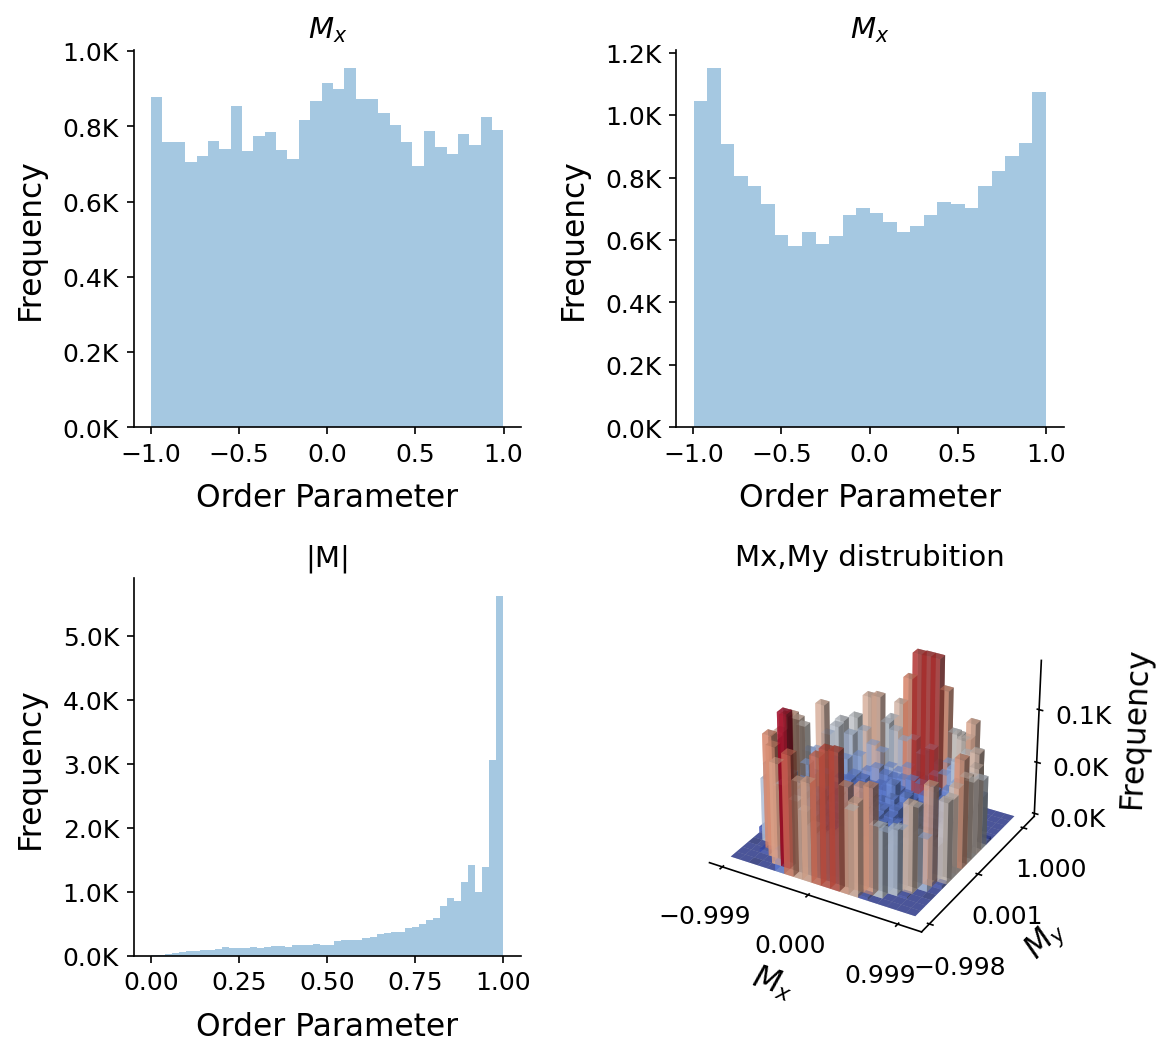

In [66]:
# Show the histogram plots
histogram_fig = fish_ddsde.histogram()

In [51]:
fish_ddsde.drift()

In [64]:
fish_ddsde.diffusion()

In [69]:
drift_diff_fish_data = fish_ddsde.data()

# Example 2 : Analysing model data vector pairwise

In [48]:
model_vector_pairwise_data, t = pyddsde.load_sample_dataset('model-data-vector-pairwise')

In [70]:
model_ddsde = pyddsde.Characterize(model_vector_pairwise_data, t, show_summary=False) 

Generating Slider data: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


| Data Type (vector)   :      True      | Autocorrelation Time :       13       |
| Gaussian Noise       :      True      | Mx range             :   (-1.0, 1.0)  |
| My range             :   (-1.0, 1.0)  | range |M|            :   (0.0, 1.0)   |
| Mx mean              :      -0.01     | My mean              :      -0.01     |
| M mean               :      0.75      | (dt, delta_t)        :     (13, 1)    |



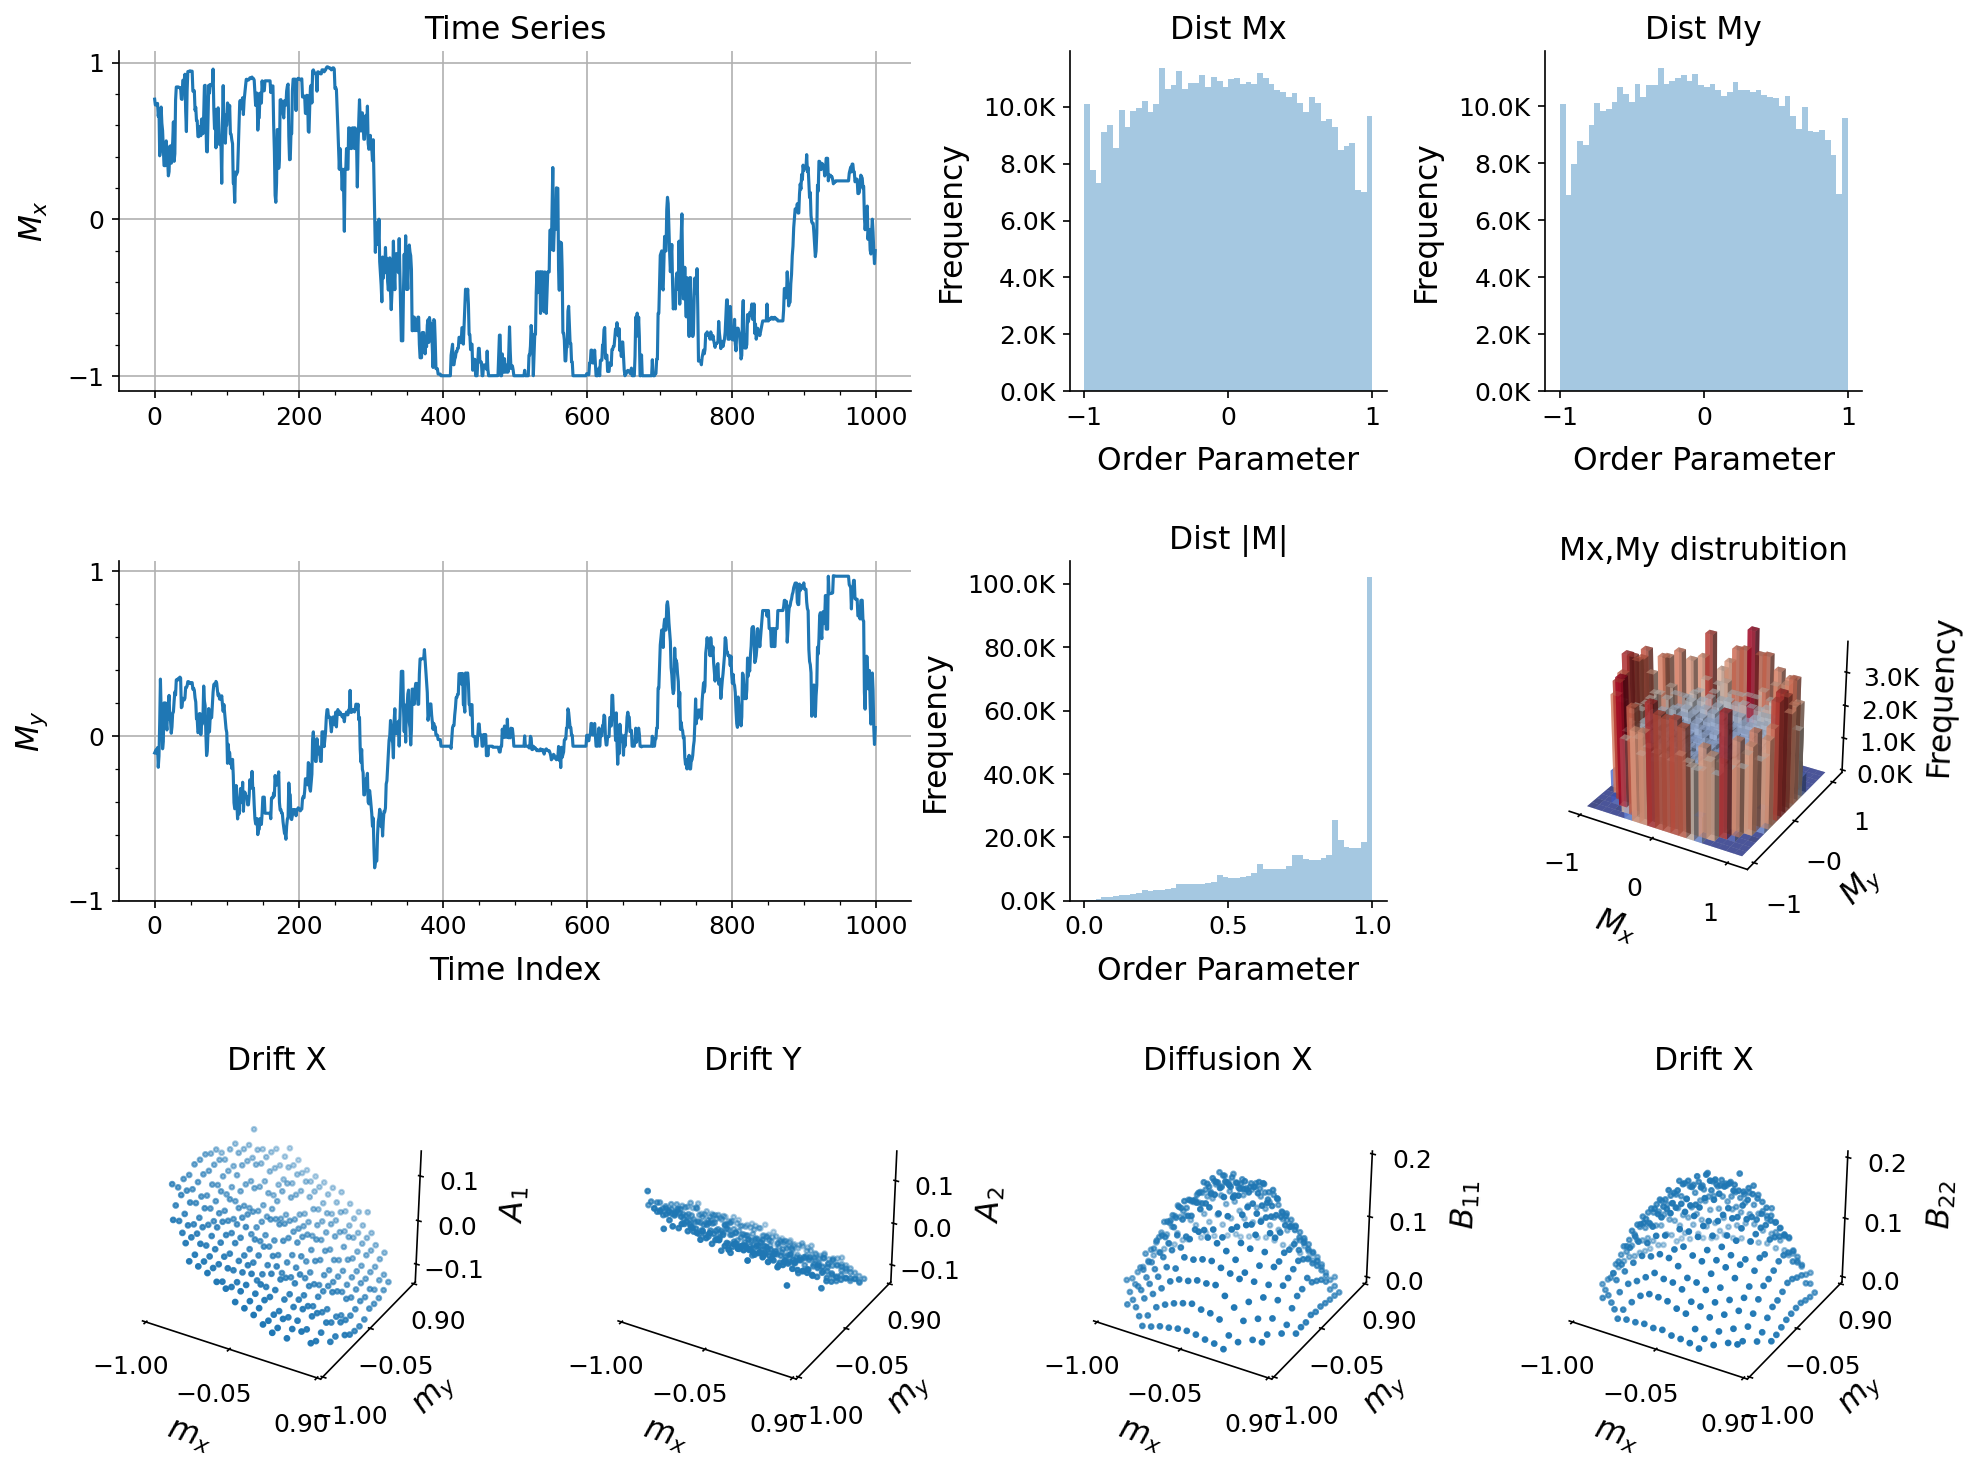

In [84]:
model_summary_fig = model_ddsde.summary()

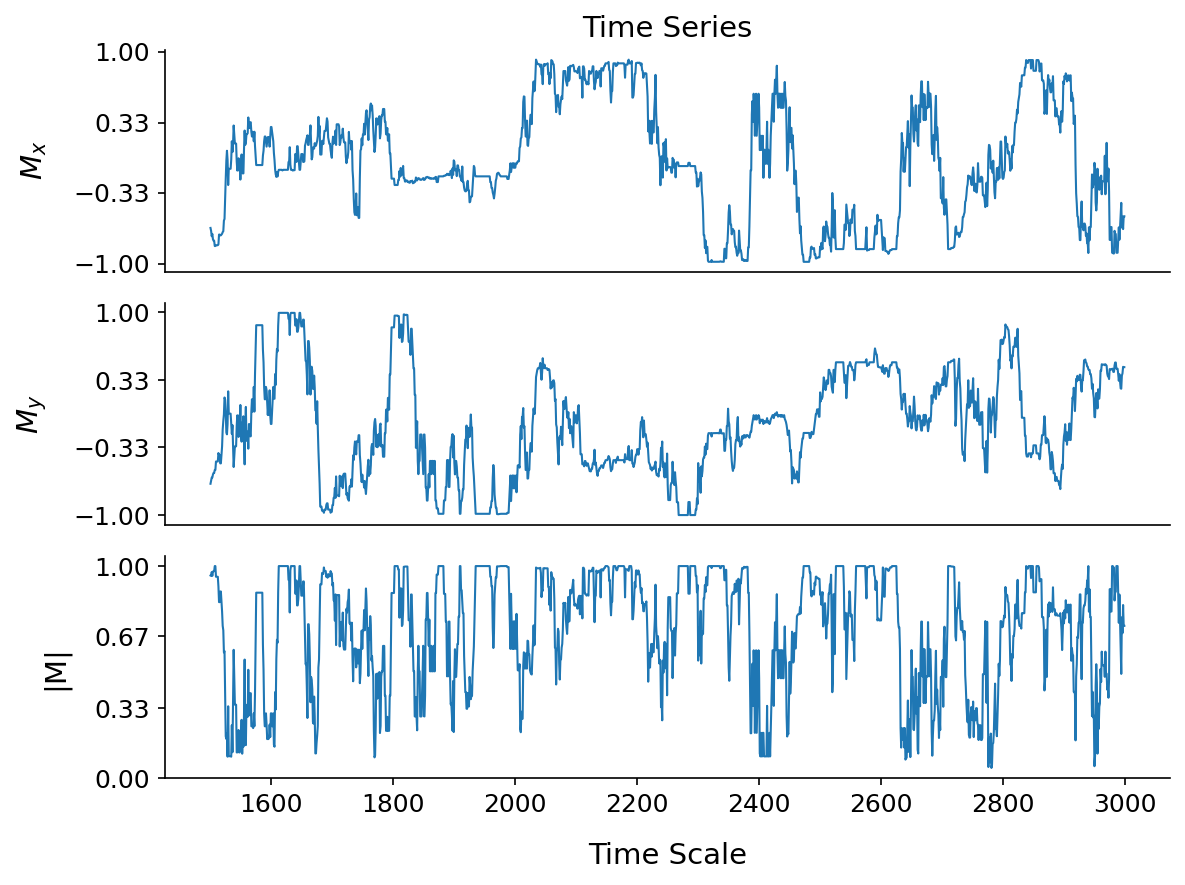

In [81]:
# Show timeseries from 1500 to 3000 index
model_timeseries_fig = model_ddsde.timeseries(start=1500, end=3000, n_ticks=4, dpi=200)

In [72]:
model_ddsde.drift()

In [85]:
# Get drift and diffusion for drift timescale 12 and diffusion timescale 1
drift_diff_model_data = model_ddsde.data(drift_time_scale=12, diff_time_scale=1)

# Example 3: Comparing DriftX the results of Example 1 and Example 2

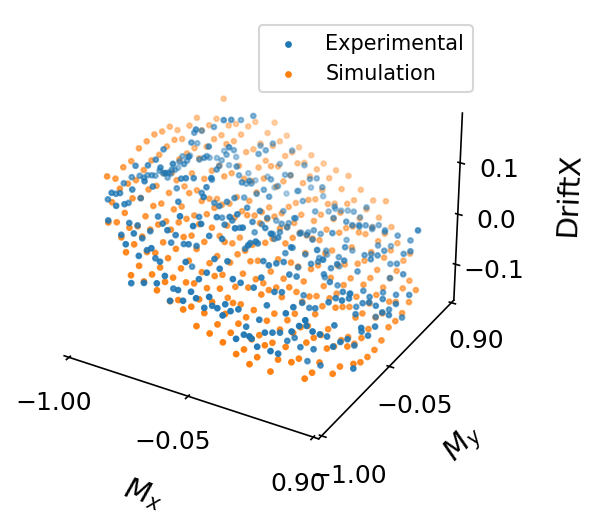

In [121]:
# Plot the fish data driftX resutls on 3d axis
compare_fig = model_ddsde.plot_data(drift_diff_fish_data.driftX,
                                    legend_label='Experimental')

# Plot model data driftX on the same figure as above, (by passing its axis in plot_data)
compare_fig = model_ddsde.plot_data(drift_diff_model_data.driftX, 
                                    ax=compare_fig.ax, 
                                    legend_label='Simulation',
                                    x_label='$M_x$',
                                    y_label='$M_y$',
                                    z_label='DriftX')

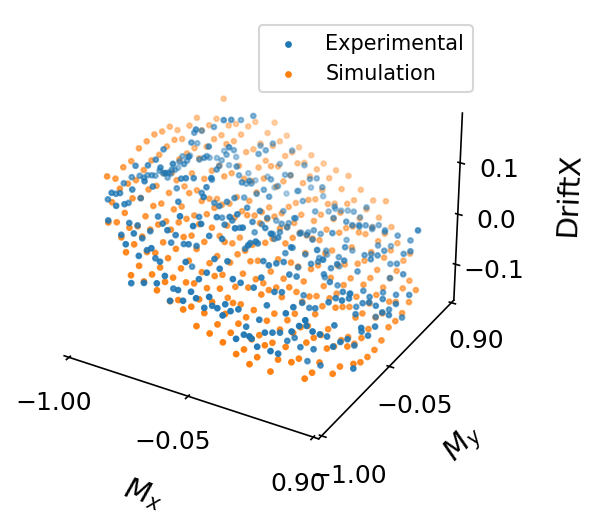

In [122]:
# Show the figure
compare_fig.fig

# Example 4: Analysing ternary scalar-model data

In [125]:
data_model_scalar, t = pyddsde.load_sample_dataset('model-data-scalar-ternary')

Generating Slider data: 100%|██████████| 28/28 [00:00<00:00, 50.07it/s]


| Data Type (vector)   :      False     | Autocorrelation Time :       85       |
| Gaussian Noise       :      True      | M range              :   (-1.0, 1.0)  |
| M mean               :      0.05      | |M| mean             :      0.74      |

Dt = 9
dt= 1


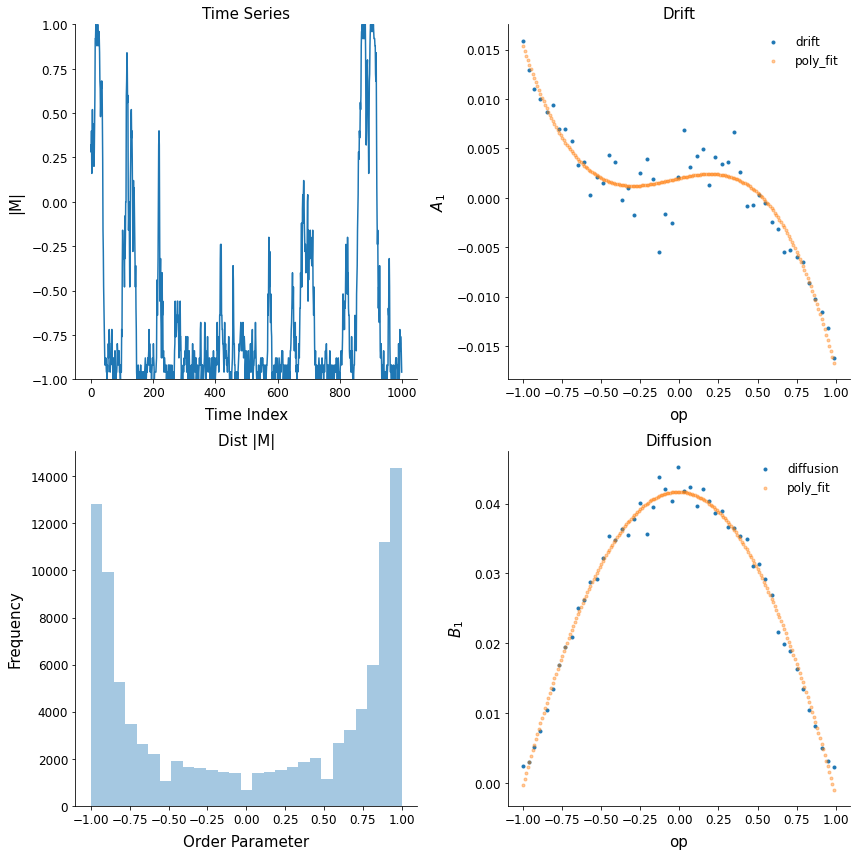

In [129]:
scalar_model_ddsde = pyddsde.Characterize(data_model_scalar, t, slider_range=(1,100,20), slider_timescales=[1,2,3,4,5,6,7,8,9,10])

In [133]:
scalar_model_ddsde.parameters()

{'dt_': 'auto',
 't_lag': '1000',
 'max_order': '9',
 'inc': '0.01',
 'inc_x': '0.1',
 'inc_y': '0.1',
 'delta_t': '1',
 'order_metric': 'R2_adj',
 'fft': 'True',
 'n_trials': '1',
 'drift_order': '3',
 'diff_order': '2',
 'op_range': '(-1.0, 1.0)',
 'op_x_range': 'None',
 'op_y_range': 'None',
 'slider_range': '(1, 100, 20)',
 'slider_timescales': '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]',
 'vector': 'False',
 't_int': '0.9999990916',
 'autocorrelation_time': '85.63247382006958',
 'dt': '9',
 'gaussian_noise': 'True',
 'k': '-6.579598912102661',
 'l_lim': '-68.11156030874818',
 'h_lim': '92.90277362290743'}

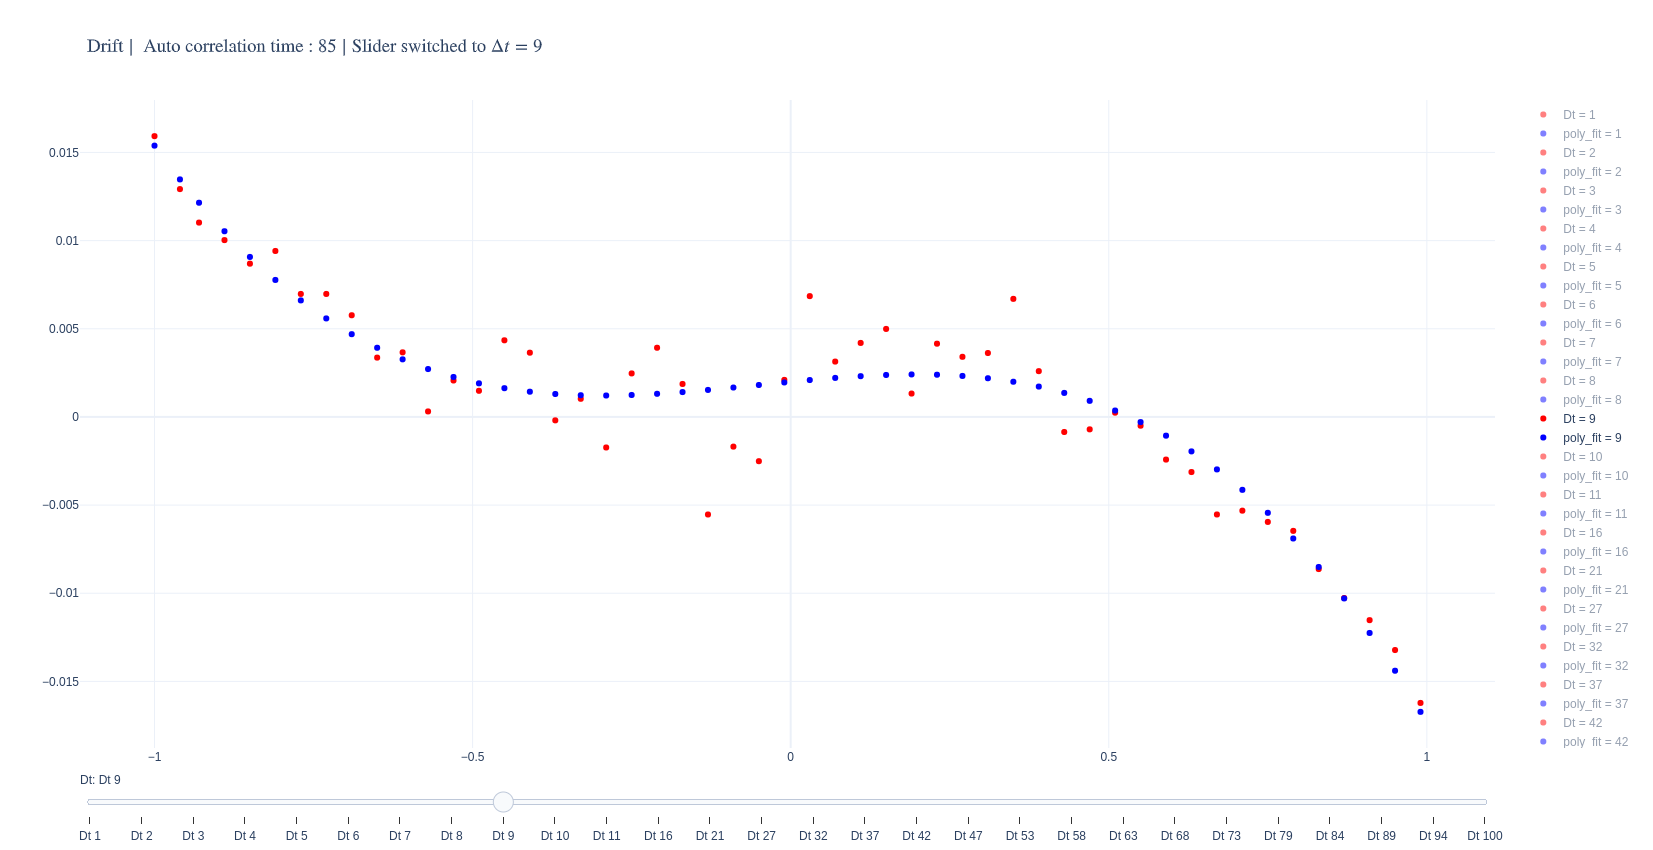

In [130]:
scalar_model_ddsde.drift()

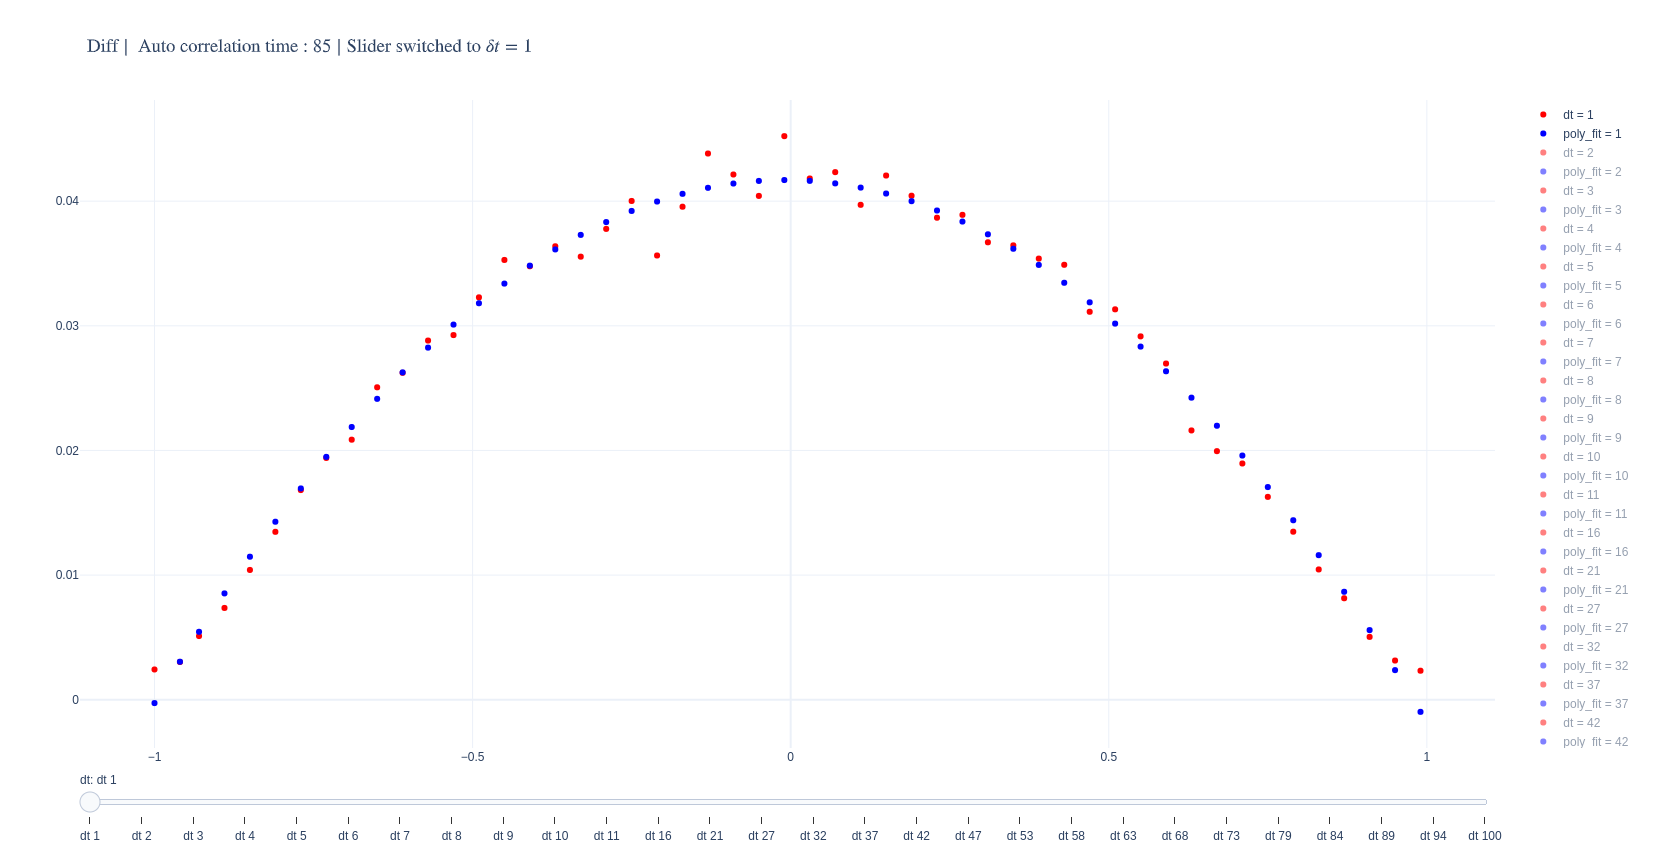

In [131]:
scalar_model_ddsde.diffusion()

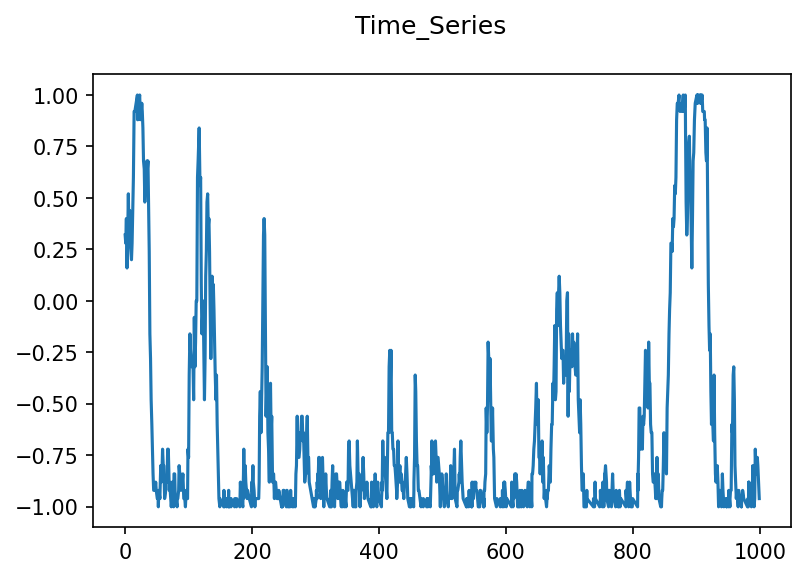

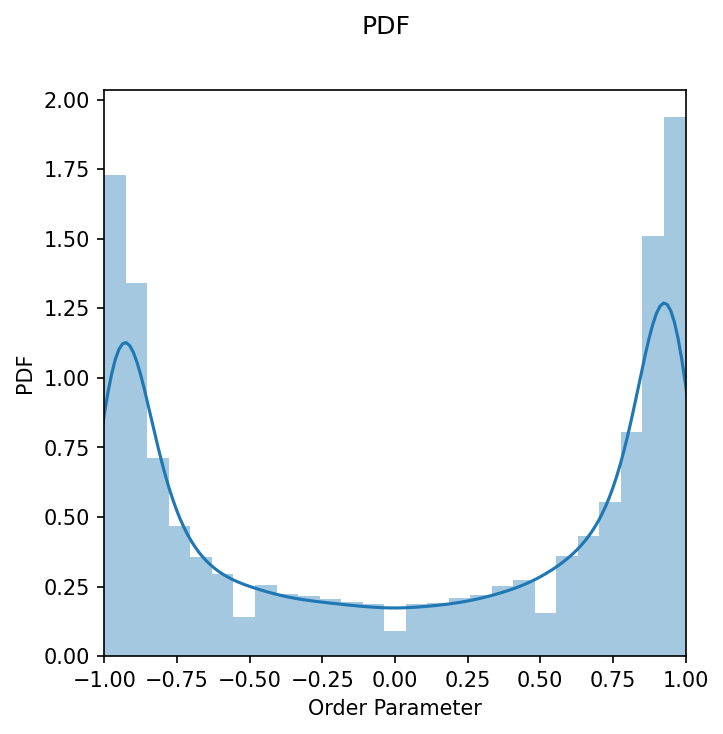

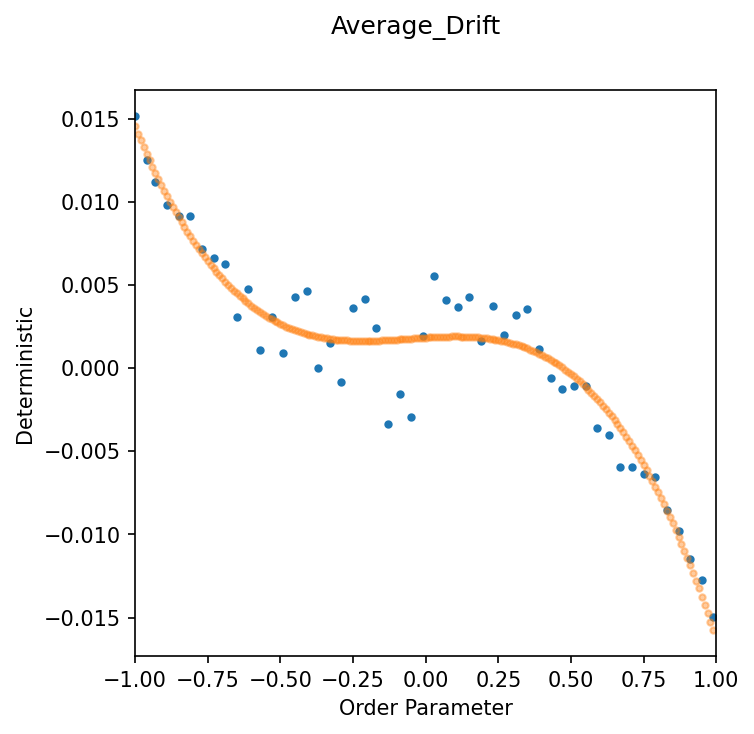

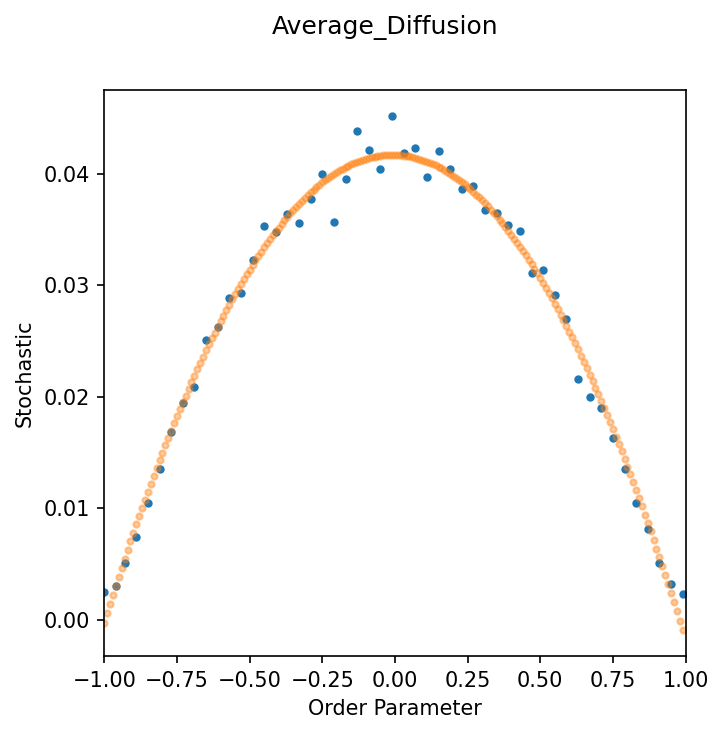

In [142]:
#Visualize for a timescale
scalar_model_ddsde.visualize(drift_time_scale=11)

In [145]:
# Export data
scalar_model_ddsde.export_data(zip=True)

'Exported to /home/ashwin/Documents/Schooling_Fish/package/git_hub/pyFish/notebooks/results/2021-03-09 12-31-44'